# Avanced Automation - Assignment 1

To be delivered until 2024-12-06 23:59:59.

**Submission Notes**:
- You should use Google Colab for the assignment.
- After running the entire notebook (including graphs and outputs), save the notebook as a .pdf file, by going to File - Print - Destination: Save as PDF.
- Create a .zip file containing both the .ipynb file (the notebook itself) and the .pdf and submit it in Fénix.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

The real relationship is linear. A cubic model can adapt to a linear relation, finding a potential solution that minimises the error more than the cubic model, but this would be overfitting.

**1.2** Answer question 1.a) considering the test RSS rather than the training RSS.


Here the linear model would have the lowest RSS. Because the cubic model would be overfitted to the random noise of the training data, it would not accurately describe the relationship with new data.




**1.3** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

The cubic model will more accurately describe the relation, because it is more flexible.

**1.4** Answer question 1.c) considering the test RSS rather than the training RSS.

There is not enough information to know how accurate the relation can be described with the cubic model, as opposed to the linear model, without knowing more about the complexity of the relationship.

**2.** Consider now a dataset of measurements of physical measurements of crabs in the Boston area.

The dataset has the following variables:
- `sex` - Sex of the crab, either male (M), female (F) or indeterminate (I).
- `length` - Length of the crab (in feet)
- `diameter` - Diameter of the crab (in feet)
- `height` - Height of the crab (in feet)
- `weight` - Weight of the crab (in ounces)
- `shucked_weight` - Weight without the shell (in ounces)
- `viscera_weight` - Weight of internal organs (in ounces)
- `shell_weight` - Weight of the shell (in ounces)
- `age` - Age of the crab (in months)

**2.1** Load the dataset `crab_data.csv`.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/crab_data.csv")
df.head()

,sex,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


**2.2** Check if the dataset has missing values. If so, discard any row that has a missing value.

In [10]:
df.isnull().values.any()

False

**2.3** How many crabs of indeterminate sex are older than 15 months?

In [11]:
crab_ages = df['age']
crab_sexes = df['sex']
counter = 0

for i in range(len(crab_ages)):
  if crab_ages[i] > 15 and crab_sexes[i] == 'I':
    counter += 1

print(counter)

21


**2.4** Plot a correlation matrix of the numerical columns (with a statistical significance of 0.1%).

In [12]:
num_df = df.select_dtypes(include=['float64', 'int64'])
num_df.corr()

,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,age
length,1.000000,0.986653,0.823081,0.925374,0.898181,0.903253,0.897736,0.554973
diameter,0.986653,1.000000,0.829532,0.925770,0.893626,0.899810,0.905561,0.573844
height,0.823081,0.829532,1.000000,0.814405,0.770961,0.793272,0.812290,0.551956
weight,0.925374,0.925770,0.814405,1.000000,0.969077,0.965583,0.955269,0.538819
shucked_weight,0.898181,0.893626,0.770961,0.969077,1.000000,0.931280,0.882406,0.418760
viscera_weight,0.903253,0.899810,0.793272,0.965583,0.931280,1.000000,0.906105,0.501328
shell_weight,0.897736,0.905561,0.812290,0.955269,0.882406,0.906105,1.000000,0.625195
age,0.554973,0.573844,0.551956,0.538819,0.418760,0.501328,0.625195,1.000000


**2.5** Split the data into test and training datasets.
Consider a test dataset comprised of 30% of the whole dataset.

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

crab_train, crab_test = train_test_split(
    num_df, test_size=0.30, random_state=42)
crab_train.head()

,length,diameter,height,weight,shucked_weight,viscera_weight,shell_weight,age
2402,1.6000,1.3125,0.4375,39.179009,18.313777,8.830869,10.489315,9
1053,1.3000,1.0125,0.3500,23.175716,7.923685,5.187958,7.370870,17
3232,1.2250,0.8875,0.3875,27.810859,13.182517,5.712424,7.101550,8
22,0.9250,0.6875,0.2375,7.285821,2.877474,1.559222,2.338834,6
1745,0.8375,0.6500,0.2125,5.443104,2.749901,0.850485,1.530873,6


**2.6** Perform a simple linear regression to predict the `age` with a single predictor.
Explain why you chose the predictor.

Print the obtained model and the $R^2$ on the train and test datasets.


In [14]:
from sklearn.linear_model import LinearRegression

X_train = pd.DataFrame(crab_train['shell_weight'])
y_train = pd.DataFrame(crab_train['age'])

X_test = pd.DataFrame(crab_test['shell_weight'])
y_test = pd.DataFrame(crab_test['age'])


In [15]:
reg = LinearRegression().fit(X_train, y_train)

print(reg)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

LinearRegression()
0.39529125966223677
0.37896141262386795


**2.7** Plot a scatter plot of the response and predictor, along with the regression line.
Distinguish between the points in the train and test datasets.

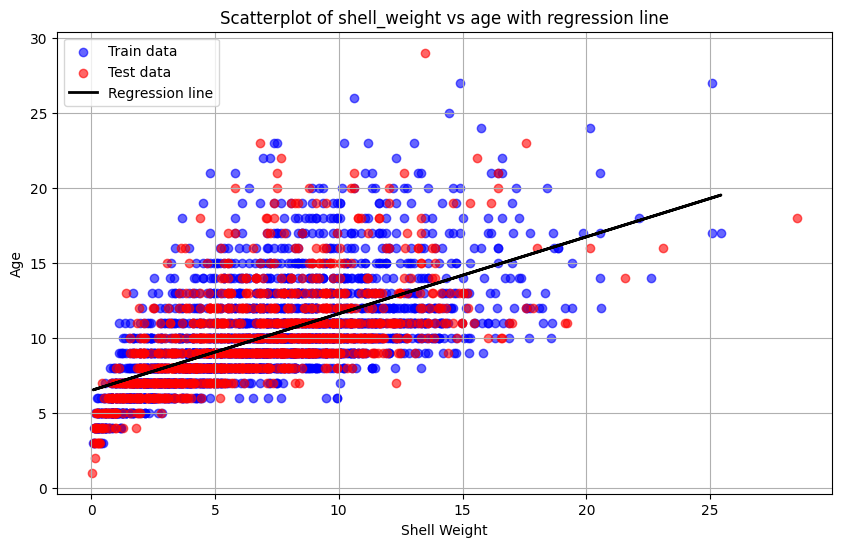

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train data', alpha=0.6)
plt.scatter(X_test, y_test, color='red', label='Test data', alpha=0.6)
plt.plot(X_train, reg.predict(X_train), color='black', linewidth=2, label='Regression line') #Not sure if this should be done on the training or the test data

plt.title('Scatterplot of shell_weight vs age with regression line')
plt.xlabel('Shell Weight')
plt.ylabel('Age')
plt.legend()
plt.grid(True)
plt.show()

**2.8** Perform a multiple linear regression considering `age` as the response and using all numerical predictors.
Compare the $R^2$ of the simple linear regression model and the multiple linear regression model.

In [17]:
X_train = crab_train.drop('age', axis=1)
y_train = pd.DataFrame(crab_train['age'])

X_test = crab_test.drop('age', axis=1)
y_test = pd.DataFrame(crab_test['age'])

mult_reg = LinearRegression().fit(X_train, y_train)


print(mult_reg.score(X_train, y_train))
print(mult_reg.score(X_test, y_test))

0.5242184777847424
0.5248664751864571


**2.9** Perform a multiple  linear regression considering `age` as the response and using all predictors. Comment on the $R^2$ of this model.

In [43]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assuming your DataFrame is called `df`

# Step 1: Encode categorical 'sex' column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])  # Encode 'F', 'M', 'I' to numbers


X = df.drop('age', axis=1)
y = df['age']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



mult_reg = LinearRegression()
mult_reg.fit(X_train, y_train)

print("Training R^2:", mult_reg.score(X_train, y_train))
print("Testing R^2:", mult_reg.score(X_test, y_test))

print("Coefficients:", mult_reg.coef_)
print("Intercept:", mult_reg.intercept_)

Training R^2: 0.524344859445568
Testing R^2: 0.5253585023629715
Coefficients: [ 0.04435622 -1.13636202  6.06033479  4.08308626  0.24624934 -0.64883686
 -0.25249228  0.41490155]
Intercept: 3.0662812156273027


## Section 2 -- Classification

**3.** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

**4.** Consider again the crab dataset.
The objective now is to predict the `sex` of the crab.

**4.1** Disregard the records that have an indeterminate sex.
Split the data into test and training datasets.
Consider a test dataset comprised of 30% of the whole dataset.

In [18]:
df = df[df['sex'] != 'I']

X = df.drop('sex', axis=1)
y = df['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

**4.2** Train a Logistic Regression model and report the accuracy and confusion matrix for the test set.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred1 = log_reg.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy", accuracy1)

cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

Accuracy 0.5601503759398496
[[107 269]
 [ 82 340]]


**4.3** Train a Linear Discriminant Analysis (LDA) model and report the accuracy and confusion matrix for the test set.

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis().fit(X_train, y_train)

y_pred2 = clf.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy", accuracy2)

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

Accuracy 0.5626566416040101
[[112 264]
 [ 85 337]]


**4.4** Train a Nearest Neighbors model. Describe and implement an approach to choose the number of neighbors. Report the accuracy and confusion matrix for the test set.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best k: {best_k}")
print(f"Best cross-validated accuracy: {grid_search.best_score_}")

best_knn = grid_search.best_estimator_
y_pred3 = best_knn.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy", accuracy3)

cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)


Best k: 9
Best cross-validated accuracy: 0.5343639193980801
Accuracy 0.5275689223057645
[[157 219]
 [158 264]]


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


To choose the number of neighbors (k) for a Nearest Neighbors model, we can use cross-validation to evaluate the performance of the model for different values of k, as well as using Grid Search to find the optimal values. Usually, we aim to stay away from k=1 beacuse it will lead to overfitting, and we try to inrease the number of neighbours gradually and carfully so we don't underfit.

**4.5** Plot the ROC curve and calculate the area under curve (AUC) for each model you trained. Comment on the results.

model 1 AUC score: 0.6015869214480185
model 2 AUC score: 0.60203438539881
model 3 AUC score: 0.5304811182817383


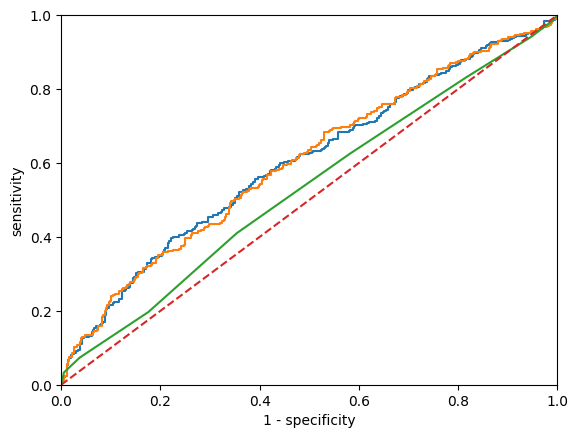

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba1 = log_reg.predict_proba(X_test)
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba1[:, 1]))
y_pred_proba2 = clf.predict_proba(X_test)
print("model 2 AUC score:", roc_auc_score(y_test, y_pred_proba2[:, 1]))
y_pred_proba3 = best_knn.predict_proba(X_test)
print("model 3 AUC score:", roc_auc_score(y_test, y_pred_proba3[:, 1]))

y_test_encoded = y_test.map({'F': 0, 'M': 1})

fpr1, tpr1, thresholds1 = roc_curve(y_test_encoded, y_pred_proba1[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test_encoded, y_pred_proba2[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test_encoded, y_pred_proba3[:,1])

plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

**4.6** A considerable part of the crab records in the dataset do not have a determined sex.
How can you build a model that makes a prediction of the sex for these records?
Describe every step of your approach.

1. To build a model that makes a prediction of the sex for these records, we start by seperating the dataset into 2 sets, one where sex is known and the other unknown.
2. We then do furthere analysis of the data to see which features are most linked to the sex feature.
3. We think the most suitable model for this task would be to train a decision tree model and rank the feautres accourding the their influence.
4. Additionally, online search might be helpful to know the relationship beetween for example, age, weight and sex of the crab.
5. After decision trees we might consider a forest model if the complexity demanded it

## Section 3 -- Bootstrap and k-Fold

**5.1** Explain how k-fold cross-validation is implemented.

1. **Split Data**: Divide the dataset into **k** equal-sized parts (folds).  
2. **Iterate k Times**: For each iteration, use one fold as the test set and the remaining **k-1** folds as the training set.  
3. **Train and Test**: Train the model on the training folds and evaluate it on the test fold, recording the performance.  
4. **Repeat**: Repeat the process until every fold has been used as the test set once.  
5. **Aggregate Results**: Average the performance metrics from all iterations to estimate the model's overall performance.  

**5.2** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV).

1. The validation set approach is sensitive to how the data is split into training and validation sets. A poor or unrepresentative split can lead to misleading results. k-fold cross-validation mitigates this issue by averaging performance across multiple splits. A disadvantage would be the increased computational cost.

2. k-fold cross-validation, with k folds (for example, k = 5 or k = 10) reduces the number of model training iterations. On the other hand LOOCV uses all of the data, and therefore has a lower bias.

## Section 4 -- Other Questions

**6.** In your group's option, what are the advantages and disadvantages of using a virtual environment when programming in Python?

We think the main advantage of venvs is that you can easily reproduce code, if you use the exact same dependencies that are stored within the venv. Systemwide installations of new packages don't affect the dependencies within the venv. A disadvantage would be that there are different copies of the same dependencies, if you use a different venv for each project.

**7.** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

I think it is better to use Google Colab when you want to train a computationally complex network, if you don't want to load your CPU with it. Also it allows for running multiple models at once, without multithreading. A big disadvantage of Google Colab is the dependency of internet connection. If you don't have a stable connection and your program loses connection to the kernel, all your training progress might be lost. In that sense, Jup Notebooks is more robust.

**8.** Enter your GitHub repository webpage.

In [44]:
https://github.com/magicomartino/AAvance_ass1.git

SyntaxError: invalid syntax (<ipython-input-44-8f363996750b>, line 1)